<a href="https://colab.research.google.com/github/AzaamAhmed/Titanic-Survival-Prediction-Analysis/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **01. Importing libraries/modules**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Information about columns**

1. PassengerId: unique id number to each passenger
2. Survived: passenger survive(1) or died(0)
3. Pclass: 1 = 1st - Upper, 2 = 2nd - Middle, 3 = 3rd - Lower
4. Name: name
5. Sex: gender of passenger
6. Age: age of passenger
7. SibSp: number of siblings/spouses
8. Parch: number of parents/children
9. Ticket: ticket number
10. Fare: amount of money spent on ticket
11. Cabin: cabin category
12. Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)


**02. Data Preprocessing and Data Cleaning**

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_data.duplicated().sum()

0

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

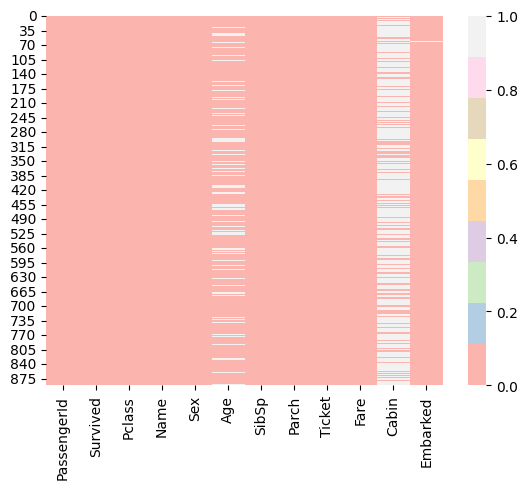

In [ ]:
sns.heatmap(titanic_data.isna(), cmap="Pastel1")

*The heatmap and data reveal that there are missing values in the "Age", "Embarked", and "Cabin" columns.*

In [ ]:
# Drop the "Cabin" column from dataset
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

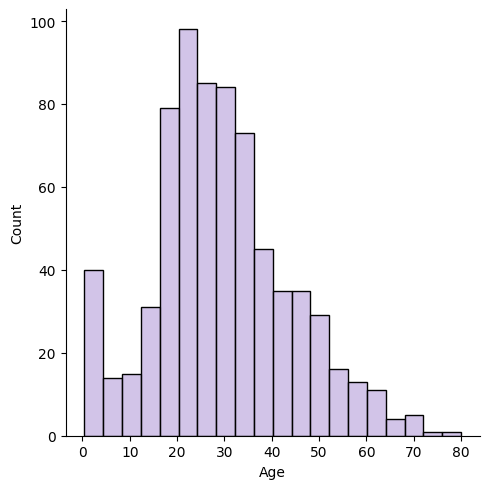

In [ ]:
# Distribution of "Age" column
sns.displot(x='Age', data=titanic_data, color='#C3B1E1')
plt.show()

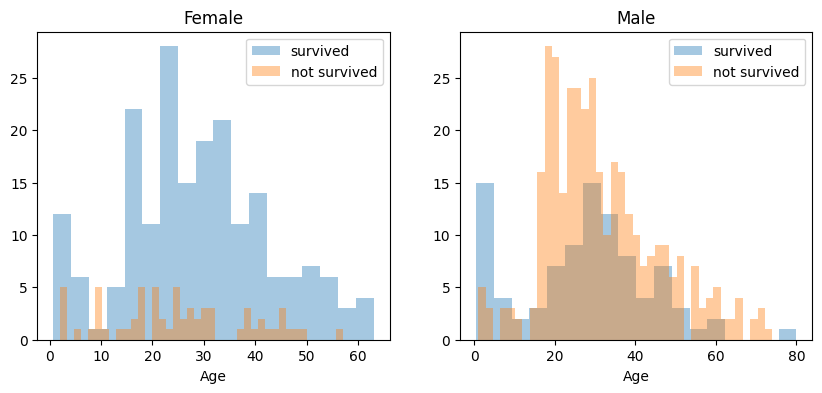

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_data[titanic_data['Sex']=='female']
men = titanic_data[titanic_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [ ]:
# Replacing the null values in the “Age” column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

*Based on the plot, it is evident that the majority of passengers fall within the 20-40 age range. To handle the missing values in the "Age" column, we will impute them with the mean age.*

In [ ]:
# Finding the mode value of the "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
# Replacing the null values in the “Embarked” column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

*In the "Embarked" column, there are only two missing values. To address this, we will find the mode of the column, which is 'S = 0'. We will then fill the missing values with this mode.*

In [ ]:
# Rechecking the number of nine values in each column
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

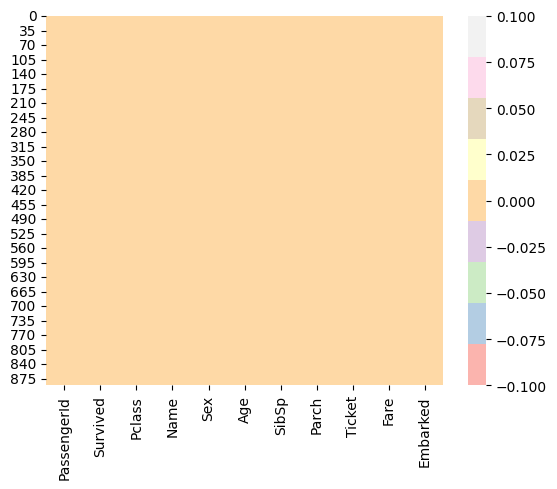

In [ ]:
# Visualizing of null values after null value treatment on a heatmap
sns.heatmap(titanic_data.isna(), cmap="Pastel1")

*This data indicates that there are no missing values (Null values) present.*

**Dropping Unnecessary Columns**

Let's lighten our data load by removing some unnecessary baggage. The 'PassengerId', 'Name', and 'Ticket' columns don't contribute to our modeling efforts, so we'll drop them to keep our dataset streamlined and efficient.

With these columns gone, our dataset is now leaner and more focused, ready for effective data modeling.

In [ ]:
# lightening the data load
titanic_data.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
#showing information about the dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**03. Data Analysis**

In [ ]:
# Getting some statistical measures about the dataset
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


**04. Data Visualization**

In [ ]:
sns.set()

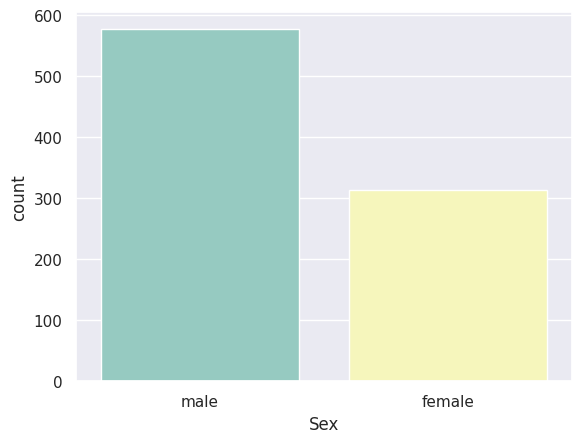

In [ ]:
# plotting Countplot for "Sex" Column
sns.countplot(x='Sex', data=titanic_data, palette = "Set3")
plt.show()

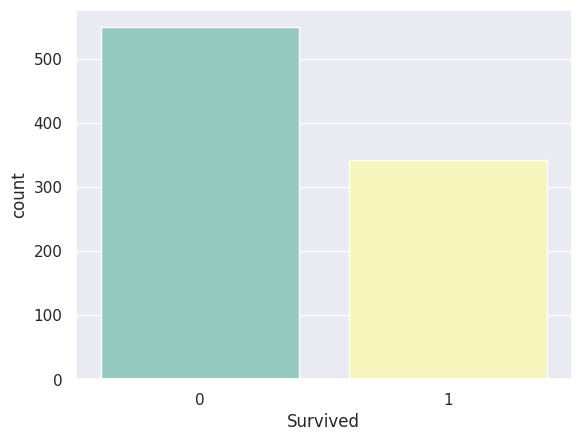

In [ ]:
# plotting Countplot for "Survived" Column
sns.countplot(x='Survived', data=titanic_data, palette = "Set3")
plt.show()

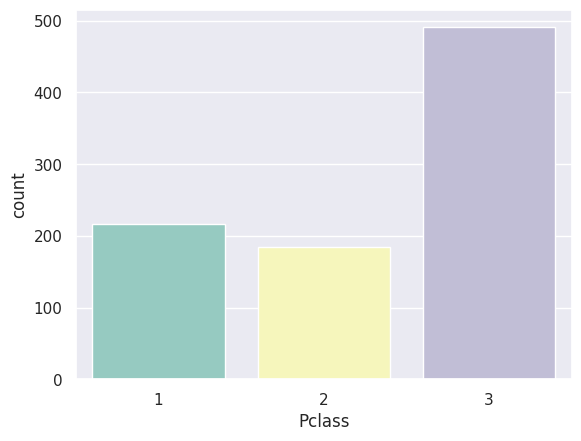

In [ ]:
# plotting Countplot for "Pclass" Column
sns.countplot(x='Pclass', data=titanic_data, palette = "Set3")
plt.show()

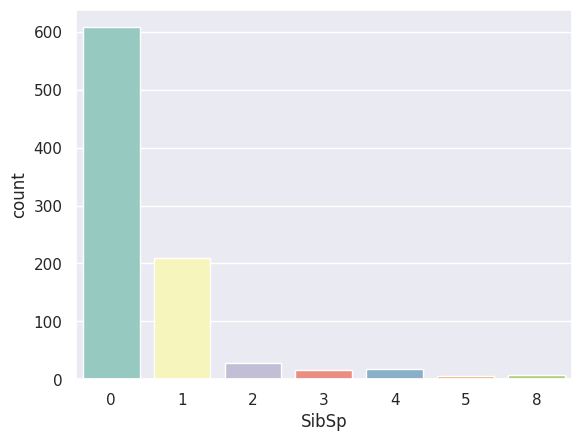

In [ ]:
# plotting Countplot for "SibSp" Column
sns.countplot(x='SibSp', data=titanic_data, palette = "Set3")
plt.show()

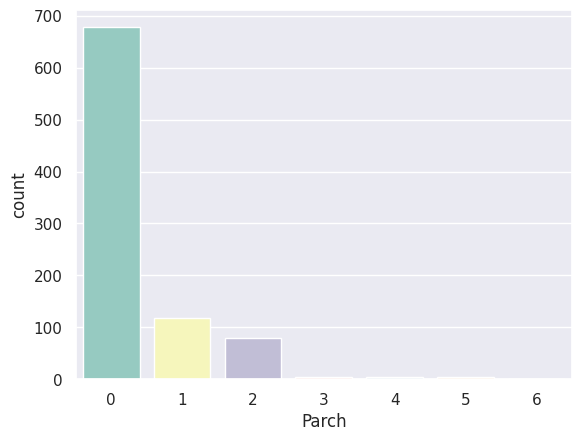

In [ ]:
# plotting Countplot for "Parch" Column
sns.countplot(x='Parch', data=titanic_data, palette = "Set3")
plt.show()

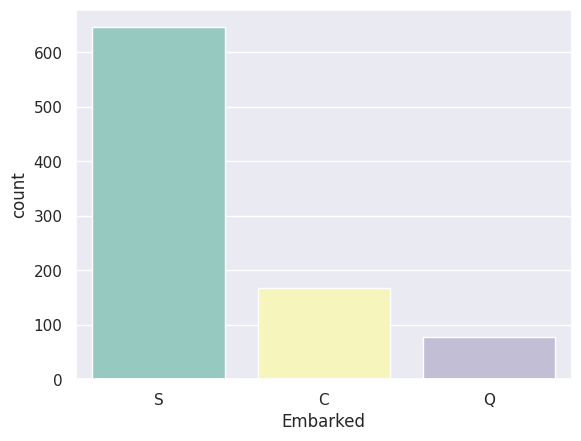

In [ ]:
# plotting Countplot for "Embarked" Column
sns.countplot(x='Embarked', data=titanic_data, palette = "Set3")
plt.show()

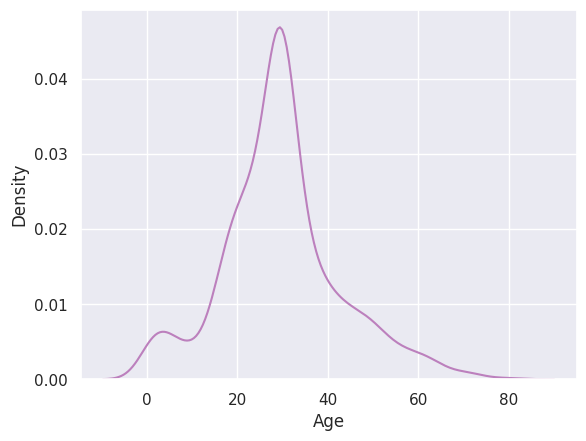

In [ ]:
# Age Distribution
sns.kdeplot(x=titanic_data['Age'], color='#bc80bd')
plt.show()

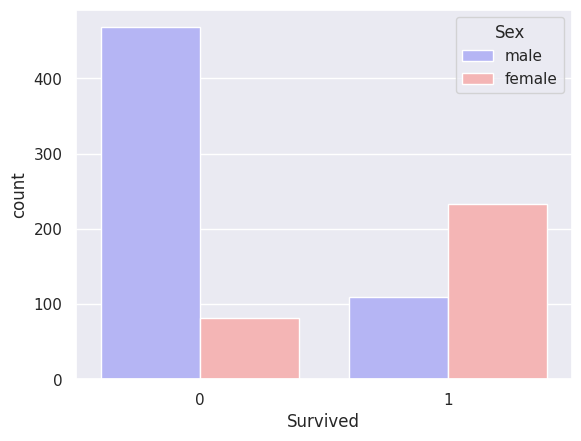

In [ ]:
# Distribution of "Survived" column based on Sex Column
sns.countplot(x=titanic_data['Survived'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

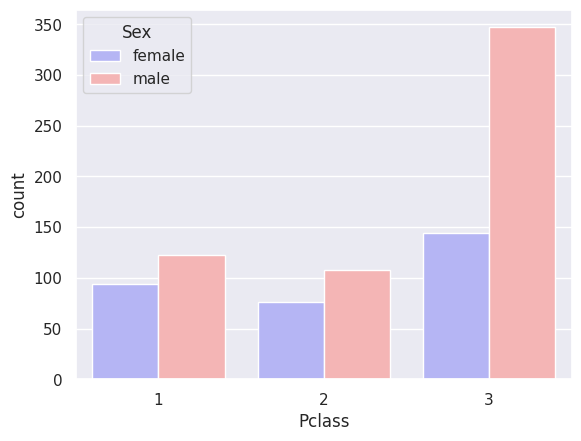

In [ ]:
# Distribution of "Pclass" column based on Sex Column
sns.countplot(x=titanic_data['Pclass'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

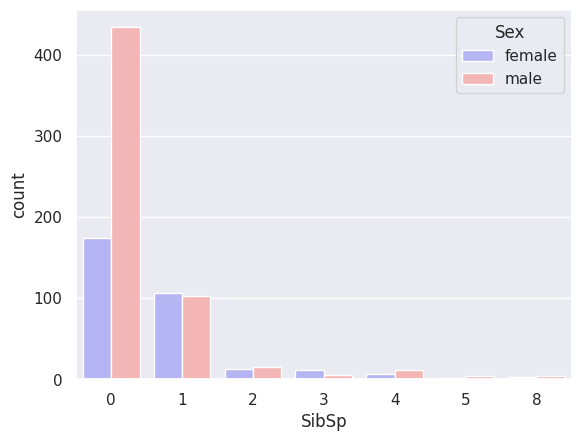

In [ ]:
# Distribution of "SibSp" column based on Sex Column
sns.countplot(x=titanic_data['SibSp'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

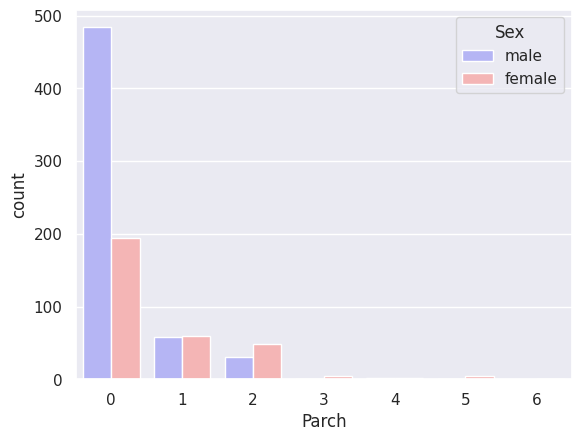

In [ ]:
# Distribution of "Parch" column based on Sex Column
sns.countplot(x=titanic_data['Parch'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

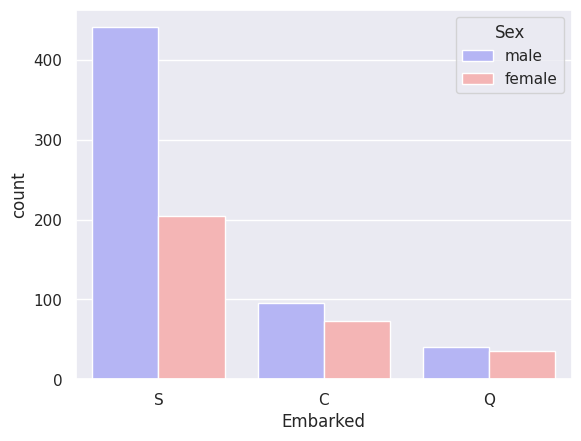

In [ ]:
# Distribution of "Embarked" column based on Sex Column
sns.countplot(x=titanic_data['Embarked'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

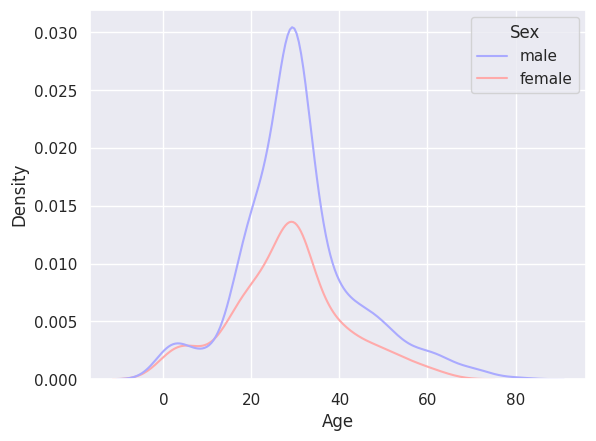

In [ ]:
# Distribution of "Age" columns based on Sex Column
sns.kdeplot(x=titanic_data['Age'],hue=titanic_data['Sex'], palette='bwr')
plt.show()

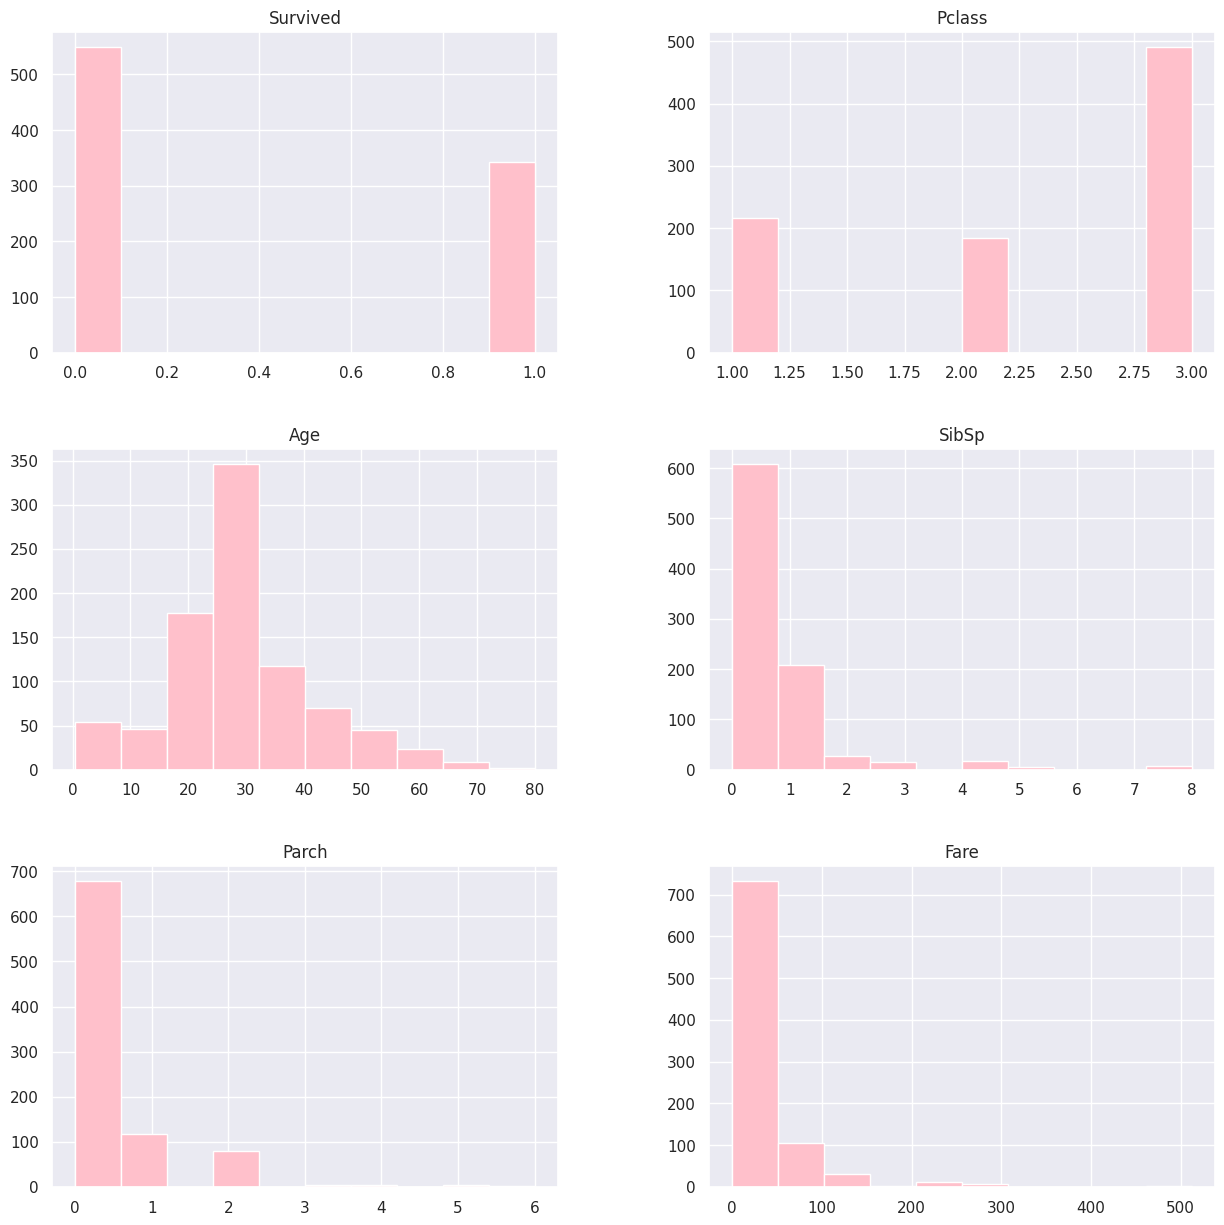

In [ ]:
# Plotting Histplot for Dataset
titanic_data.hist(figsize=(15,15),color='pink')
plt.show()

***Histogram***

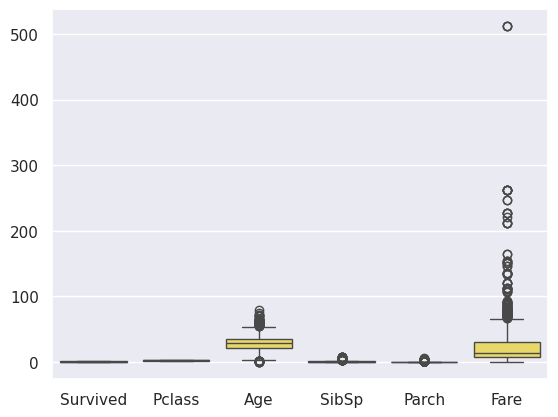

In [ ]:
# Plotting Boxplot for dataset
# Checking for outliers
sns.boxplot(titanic_data, color='#fde855')
plt.show()

***Boxplot***

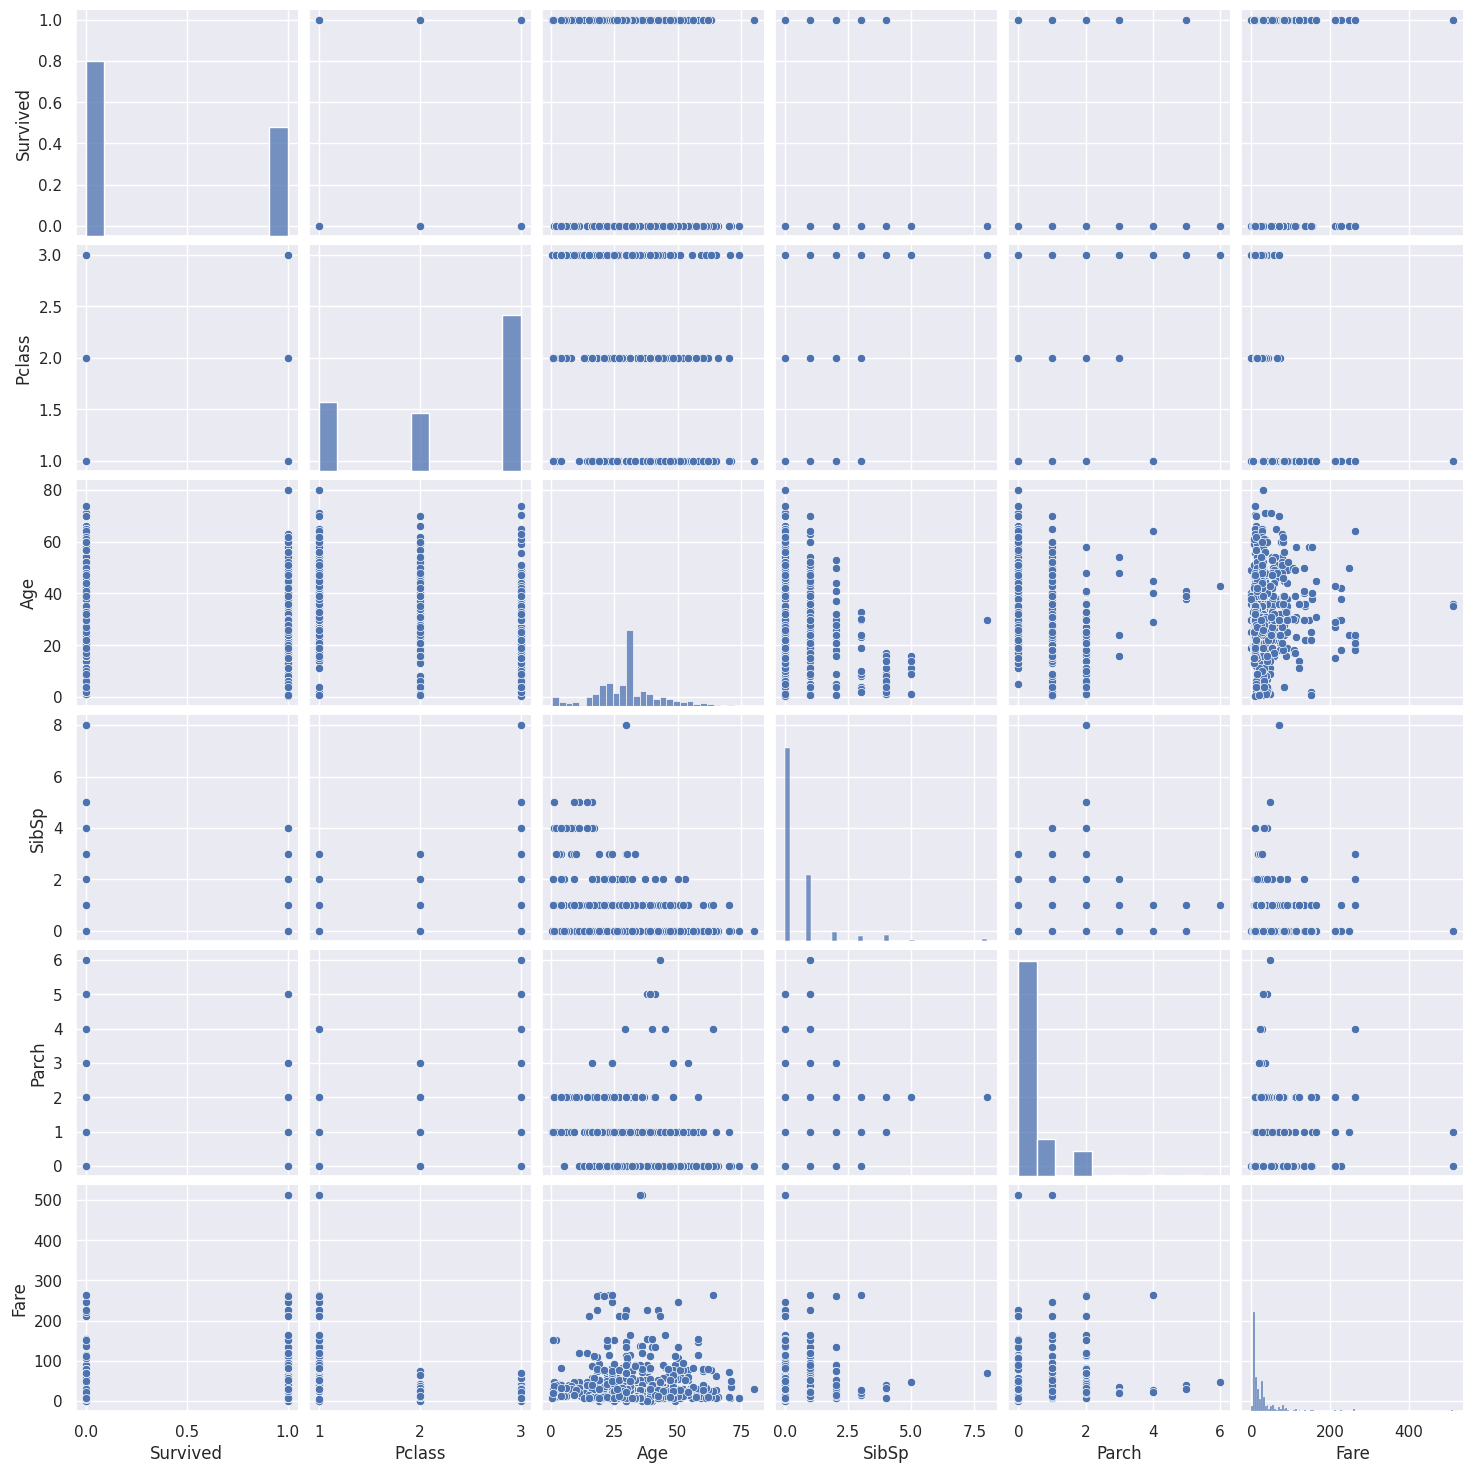

In [ ]:
# Plotting pairplot for dataset
sns.pairplot(titanic_data,)
plt.show()

***Pairplot***

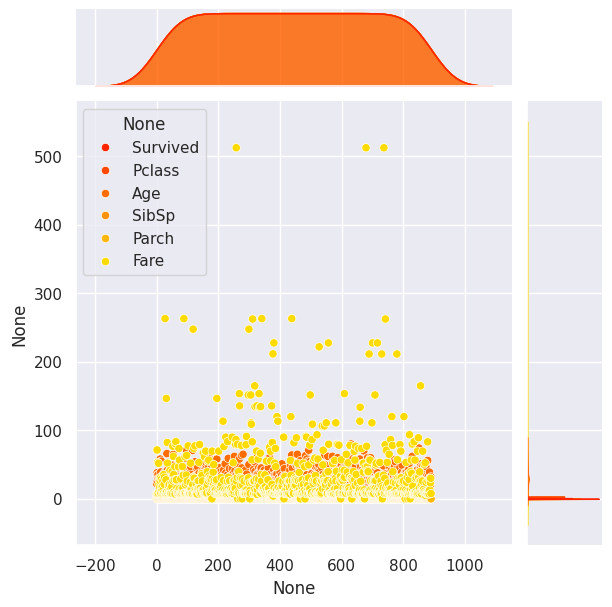

In [ ]:
# Plotting jointplot for dataset
sns.jointplot(titanic_data, palette='autumn')
plt.show()

***Jointplot***

In [ ]:
# showing Correlation
numeric_data = titanic_data.select_dtypes(include=np.number)
numeric_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


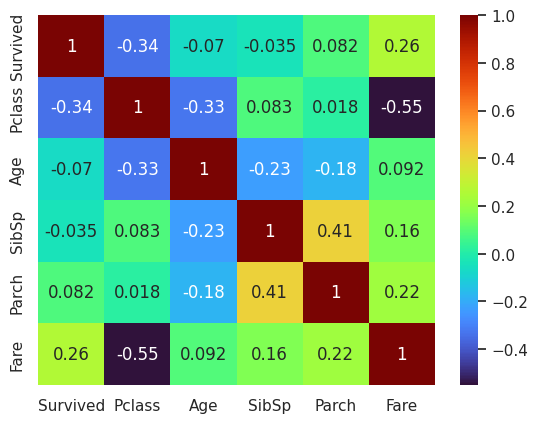

In [ ]:
# Plotting correlation plot (heatmap) for dataset
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True, cmap='turbo')
plt.show()

***Heatmap (Correlation)***

**05. Analyzing Target Variables**

In [ ]:
# Printing values in "Survived" column
print(titanic_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
# Converting data for a better understanding for the viewer
titanic_data.replace({'Survived':{0:'Not Survived', 1:'Survived'}}, inplace=True)

Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


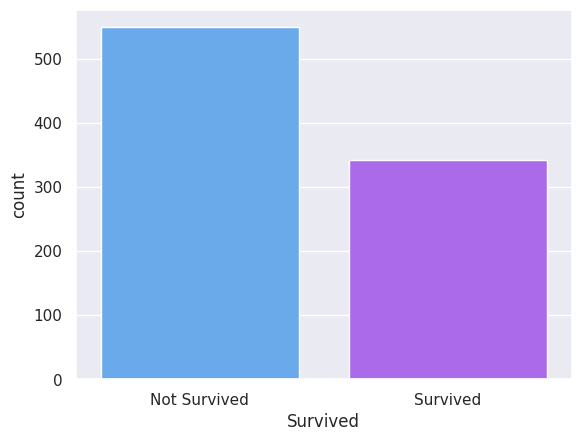

In [ ]:
# Plotting CountPlot for Survived Column
print(titanic_data['Survived'].value_counts())
sns.countplot(x=titanic_data['Survived'], palette = "cool")
plt.show()

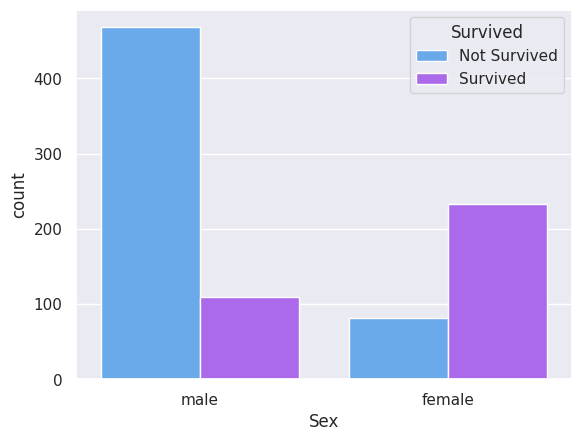

In [ ]:
# Distribution of "Sex" column based on Survived Column
sns.countplot(x=titanic_data['Sex'], hue=titanic_data['Survived'], palette='cool')
plt.show()

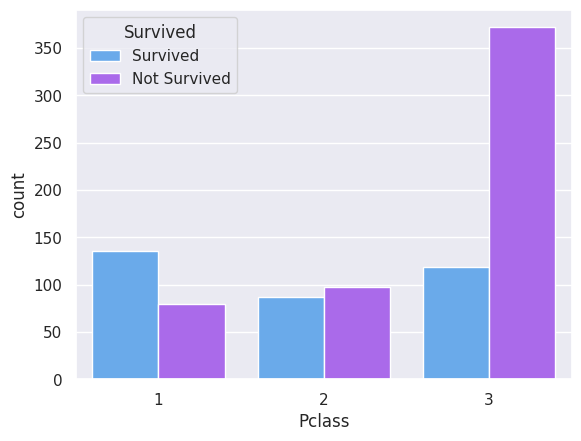

In [ ]:
# Distribution of "Pclass" column based on Survived Column
sns.countplot(x=titanic_data['Pclass'], hue=titanic_data['Survived'], palette='cool')
plt.show()

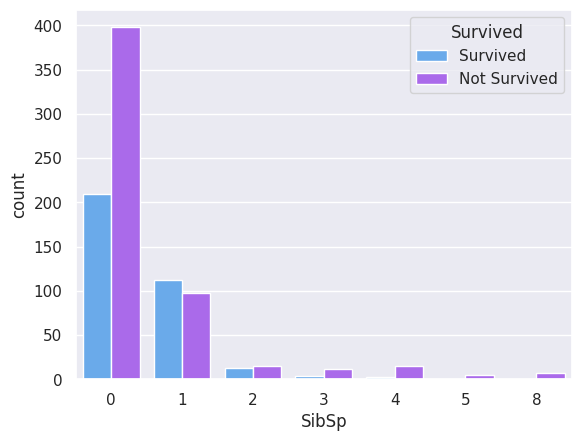

In [ ]:
# Distribution of "SibSp" column based on Survived Column
sns.countplot(x=titanic_data['SibSp'], hue=titanic_data['Survived'], palette='cool')
plt.show()

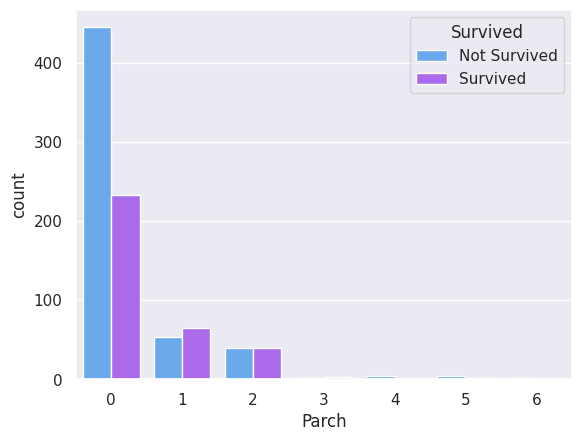

In [ ]:
# Distribution of "Parch" column based on Survived Column
sns.countplot(x=titanic_data['Parch'], hue=titanic_data['Survived'], palette='cool')
plt.show()

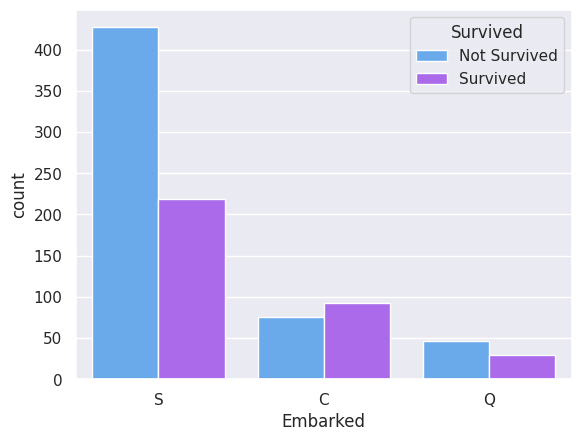

In [ ]:
# Distribution of "Embarked" column based on Survived Column
sns.countplot(x=titanic_data['Embarked'], hue=titanic_data['Survived'], palette='cool')
plt.show()

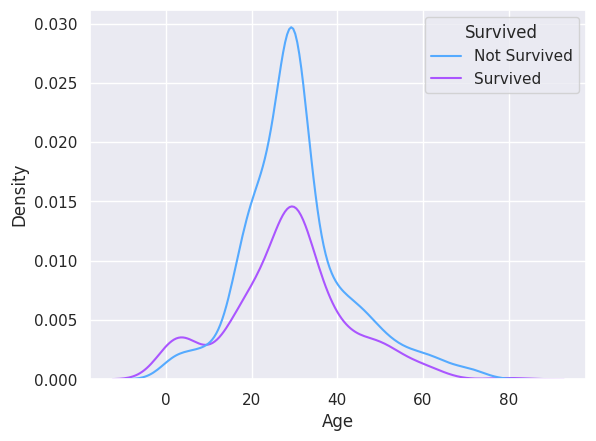

In [ ]:
# Distribution of "Age" column based on Survived Column
sns.kdeplot(x=titanic_data['Age'],hue=titanic_data['Survived'], palette='cool')
plt.show()

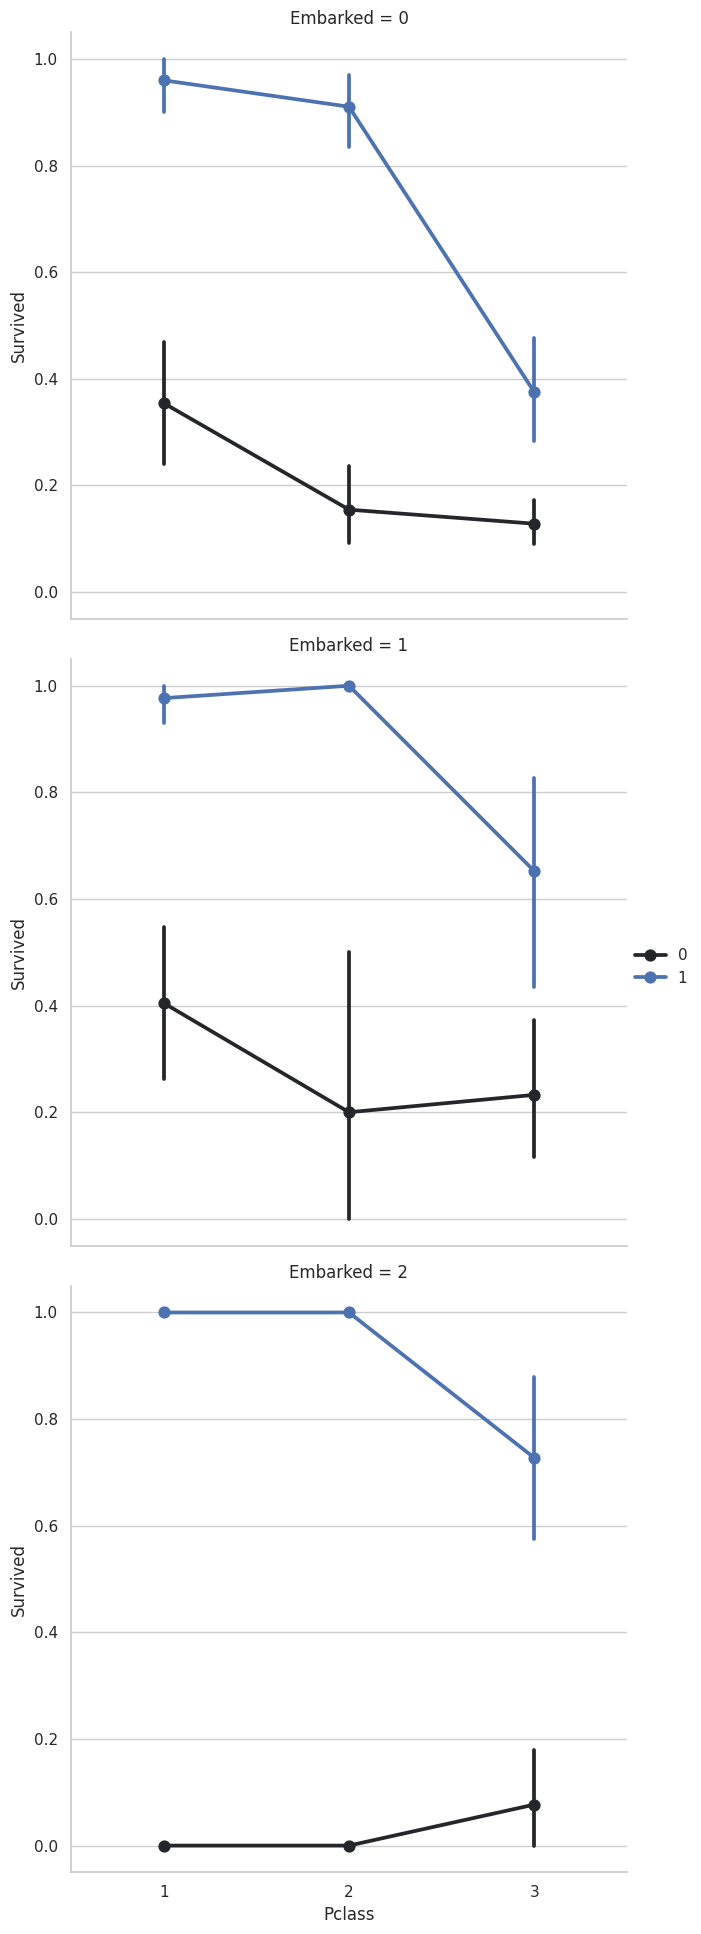

In [ ]:
FacetGrid = sns.FacetGrid(titanic_data, row='Embarked', height=6.5, aspect=1) # Change 'size' to 'height'
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

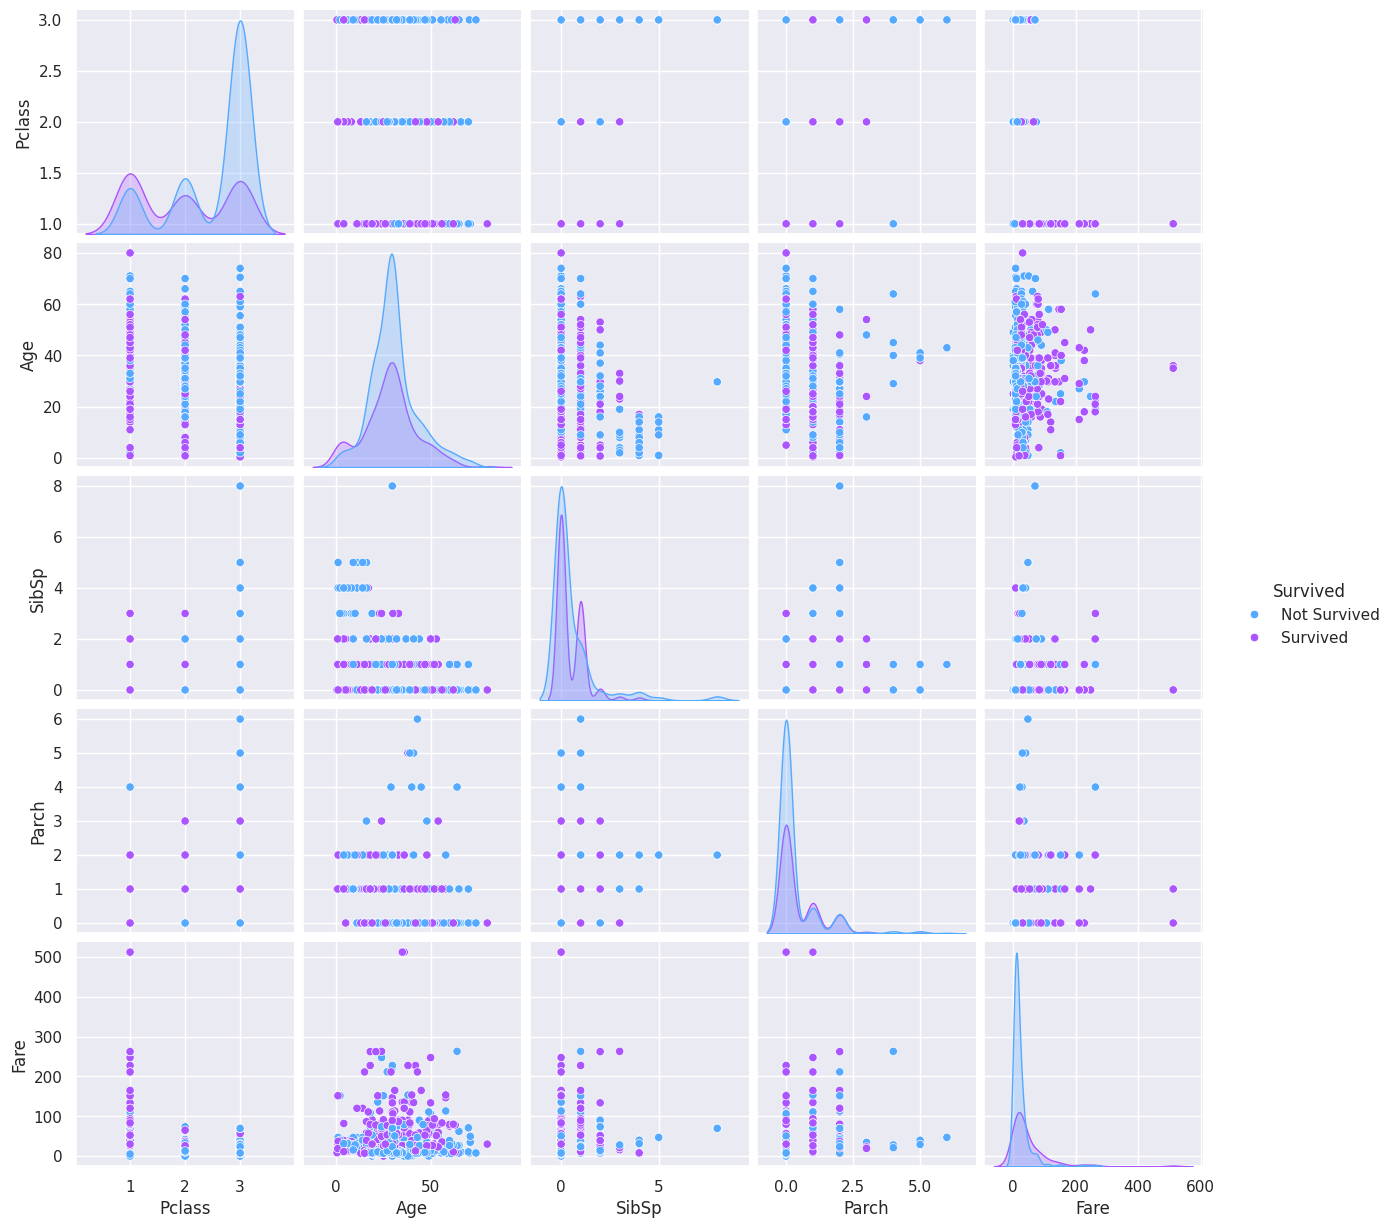

In [ ]:
# Plotting Pairplot for "Survived" Column
sns.pairplot(titanic_data, hue='Survived', palette='cool')

**6. Encoding the Categorical columns.**

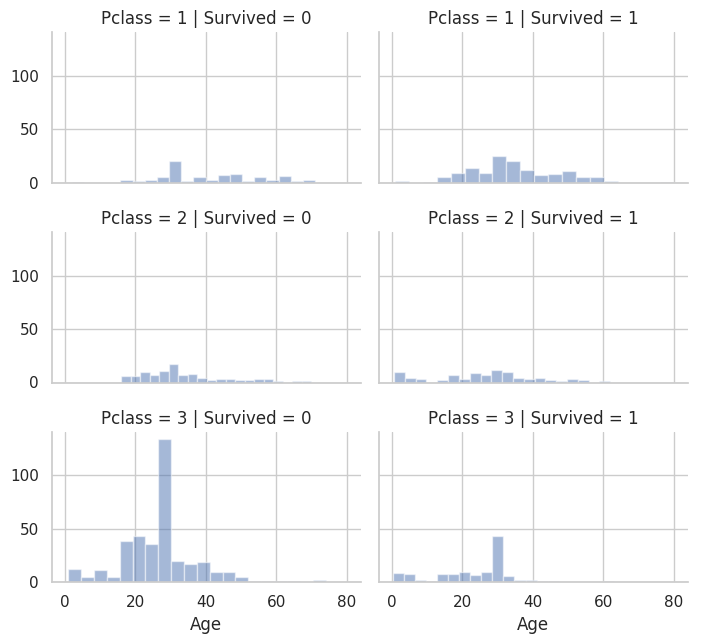

In [ ]:
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# Printing values in "Survived" column
print(titanic_data['Survived'].value_counts())

Survived
Not Survived    549
Survived        342
Name: count, dtype: int64


In [ ]:
# Printing values in "Sex" column
print(titanic_data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
# Printing values in "Embarked" column
print(titanic_data['Embarked'].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
# Converting Categorical columns
titanic_data.replace({'Survived':{'Not Survived':0, 'Survived':1}, 'Sex':{'male':0, 'female':1,}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [ ]:
# Printing first 5 rows of the dataset
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


**7. Data Modelling**

**7.1. Selecting the Independent and Dependent Features**
1. Independent Features Selection:
The list "ifcol" contains the names of the columns that will be used as the independent features. These features are used to predict the target variable.
2. Dependent Feature Selection:
y = titanic_data['Survived']: This line selects the 'Survived' column from the titanic DataFrame and stores it in y. This y variable is a Series containing the dependent feature or target variable, which indicates whether a passenger survived or not.
3. Shape and Type Information:
The shape and type prints help verify the structure and format of the selected features before proceeding with further analysis or modeling.

In [ ]:
# Defining the columns to be used as independent features
ifcol = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Selecting the independent features from the DataFrame
X = titanic_data[ifcol]

# Selecting the dependent feature (target variable) from the DataFrame
Y = titanic_data['Survived']

# Printing the shape of the independent features DataFrame
print(X.shape)

# Printing the shape of the dependent feature Series
print(Y.shape)

# Printing the type of the independent features (DataFrame)
print(type(X))

# Printing the type of the dependent feature (Series)
print(type(Y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
# Display the first few rows of the independent features
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [ ]:
# Display the first few rows of the dependent feature
print(Y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


**7.2. Splitting data into training and testing datasets.**

*   "X.shape" and "Y.shape": Show the original dimensions of the entire dataset.
*   "X_train.shape" and "Y_train.shape": Indicate that 80% of the data is allocated to the training set.
*   "X_test.shape" and "Y_test.shape": Indicate that 20% of the data is allocated to the testing set.


*This process ensures that you have separate datasets for training your model and evaluating its performance, which is crucial for preventing overfitting and assessing the generalizability of your model.*





In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# X_train: The training set for the features.
# X_test: The testing set for the features.
# Y_train: The training set for the target variable.
# Y_test: The testing set for the target variable.

In [ ]:
# X.shape: The shape of the entire target variable set before splitting.
# X_train.shape: The shape of the training set for the target variable (80% of the original data).
# X_test.shape: The shape of the testing set for the target variable (20% of the original data).
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
# Y.shape: The shape of the entire target variable set before splitting.
# Y_train.shape: The shape of the training set for the target variable (80% of the original data).
# Y_test.shape: The shape of the testing set for the target variable (20% of the original data).
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


**8. Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# This function prints the confusion matrix and classification report
# for the provided true and predicted labels.
def evaluate_classification(Y_test, Y_pred):
    cm = confusion_matrix(Y_test, Y_pred)
    print('Confusion Matrix:\n', cm)
    print('Classification Report:\n', classification_report(Y_test, Y_pred))

# This function prints the training and testing accuracy scores for the given model.
def model_scores(model):
    print('Training Accuracy:', model.score(X_train, Y_train))
    print('Testing Accuracy:', model.score(X_test, Y_test))

**8.1. Logistic Regression Model**

In [ ]:
# Creating the Logistic Regression model
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Training the model
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Computing Training and Testing scores
model_scores(lr)

Training Accuracy: 0.8146067415730337
Testing Accuracy: 0.7821229050279329


In [ ]:
# Generating Predictions
ypred_lr = lr.predict(X_test)
print(ypred_lr)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_lr)

# Compute and print accuracy score
as_lr = accuracy_score(Y_test, ypred_lr)
print('Accuracy Score', as_lr)

Confusion Matrix:
 [[91  9]
 [30 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

Accuracy Score 0.7821229050279329


**8.2. Support Vector Classifier (SVC) Model**

In [ ]:
#  Import the SVC Class
from sklearn.svm import SVC

# Building Support Vector Classifier Model
svc = SVC(C=1.0)

# Training the model
svc.fit(X_train, Y_train)

SVC()

In [ ]:
# Computing Training and Testing score
model_scores(svc)

Training Accuracy: 0.6797752808988764
Testing Accuracy: 0.6368715083798883


In [ ]:
# Generating Prediction
ypred_svc = svc.predict(X_test)
print(ypred_svc)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_svc)

# Compute and print accuracy score
as_svc = accuracy_score(Y_test, ypred_svc)
print('Accuracy Score', as_svc)

Confusion Matrix:
 [[95  5]
 [60 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.95      0.75       100
           1       0.79      0.24      0.37        79

    accuracy                           0.64       179
   macro avg       0.70      0.60      0.56       179
weighted avg       0.69      0.64      0.58       179

Accuracy Score 0.6368715083798883


**8.3. Decision Tree Classifier Model**

In [ ]:
#  Import the DecisionTreeClassifier Class
from sklearn.tree import DecisionTreeClassifier

# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=10)

# Training the model
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [ ]:
# Computing Training and Testing score
model_scores(dt)

Training Accuracy: 0.8469101123595506
Testing Accuracy: 0.7988826815642458


In [ ]:
# Generating Predictions
ypred_dt = dt.predict(X_test)
print(ypred_dt)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_dt)

# Compute and print accuracy score
as_dt = accuracy_score(Y_test, ypred_dt)
print('Accuracy Score', as_dt)

Confusion Matrix:
 [[91  9]
 [27 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.85      0.66      0.74        79

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.79       179

Accuracy Score 0.7988826815642458


**8.4. k-Nearest Neighbors (kNN) Model**

In [ ]:
#  Import the KNeighborsClassifier Class
from sklearn.neighbors import KNeighborsClassifier

# Building the K-Neighbors Classifierr Model
knn = KNeighborsClassifier(n_neighbors=8)

# Training the model
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# Computing Training and Testing score
model_scores(knn)

Training Accuracy: 0.7696629213483146
Testing Accuracy: 0.6703910614525139


In [ ]:
# Generating Predictions
ypred_knn = knn.predict(X_test)
print(ypred_knn)

[0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification report, accuracy score
evaluate_classification(Y_test, ypred_knn)

# Compute and print accuracy score
as_knn = accuracy_score(Y_test, ypred_knn)
print('Accuracy Score', as_knn)

Confusion Matrix:
 [[85 15]
 [44 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.74       100
           1       0.70      0.44      0.54        79

    accuracy                           0.67       179
   macro avg       0.68      0.65      0.64       179
weighted avg       0.68      0.67      0.65       179

Accuracy Score 0.6703910614525139


**8.5. AdaBoost (Adaptive Boosting) Model**

In [ ]:
#  Import the AdaBoost Classifier Class
from sklearn.ensemble import AdaBoostClassifier

# Building the AdaBoostClassifier Model
ada_boost = AdaBoostClassifier(n_estimators=80)

# Training the model
ada_boost.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=80)

In [ ]:
# Computing the Training and Testing Score
model_scores(ada_boost)

Training Accuracy: 0.848314606741573
Testing Accuracy: 0.7374301675977654


In [ ]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(X_test)
print(ypred_ada_boost)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
evaluate_classification(Y_test, ypred_ada_boost)

# Compute and print accuracy score
as_ada_boost = accuracy_score(Y_test, ypred_ada_boost)
print('Accuracy Score', as_ada_boost)

Confusion Matrix:
 [[84 16]
 [31 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78       100
           1       0.75      0.61      0.67        79

    accuracy                           0.74       179
   macro avg       0.74      0.72      0.73       179
weighted avg       0.74      0.74      0.73       179

Accuracy Score 0.7374301675977654


**8.6. Random Forest Classifier Model Model**

In [ ]:
#  Import the RandomForestClassifier Class
from sklearn.ensemble import RandomForestClassifier

# Building the RandomForestClassifier Model
rfc = RandomForestClassifier(n_estimators=80, criterion='entropy', min_samples_split=5, max_depth=10)

# Training the model
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [ ]:
# Computing the Training and Testing Score
model_scores(rfc)

Training Accuracy: 0.9213483146067416
Testing Accuracy: 0.8044692737430168


In [ ]:
# Generating the predictions
ypred_rfc = rfc.predict(X_test)
print(ypred_rfc)

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [ ]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
evaluate_classification(Y_test, ypred_rfc)

# Compute and print accuracy score
as_rfc = accuracy_score(Y_test, ypred_rfc)
print('Accuracy Score', as_rfc)

Confusion Matrix:
 [[91  9]
 [26 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.85      0.67      0.75        79

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179

Accuracy Score 0.8044692737430168


**9. Comparing Classification Model Performance**

In [2]:
import pandas as pd

# Assuming these are the scores of the models
as_lr = 0.85
as_svc = 0.88
as_dt = 0.81
as_knn = 0.80
as_ada_boost = 0.89
as_rfc = 0.87

# Creating the DataFrame to compare model scores
models = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Support Vector Classifier',
        'Decision Tree Classifier',
        'k-Nearest Neighbors',
        'AdaBoost',
        'Random Forest Classifier'
    ],
    'Score': [as_lr, as_svc, as_dt, as_knn, as_ada_boost, as_rfc]
})

# Sorting the DataFrame by 'Score' in descending order
sorted_models = models.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
print(sorted_models)

# Optional: Jupyter Notebook users can use this for a prettier view
from IPython.display import display

# Apply formatting before background gradient
# format the 'Score' column to have 2 decimal places
styled_df = sorted_models.style.format({'Score': "{:.2f}"})
display(styled_df.background_gradient(cmap='Blues'))

                       Model  Score
4                   AdaBoost   0.89
1  Support Vector Classifier   0.88
5   Random Forest Classifier   0.87
0        Logistic Regression   0.85
2   Decision Tree Classifier   0.81
3        k-Nearest Neighbors   0.80


,Model,Score
4,AdaBoost,0.89
1,Support Vector Classifier,0.88
5,Random Forest Classifier,0.87
0,Logistic Regression,0.85
2,Decision Tree Classifier,0.81
3,k-Nearest Neighbors,0.80


*This code snippet effectively visualizes the accuracy scores of different classification algorithms using a bar plot, making it easier to compare their performance visually.*

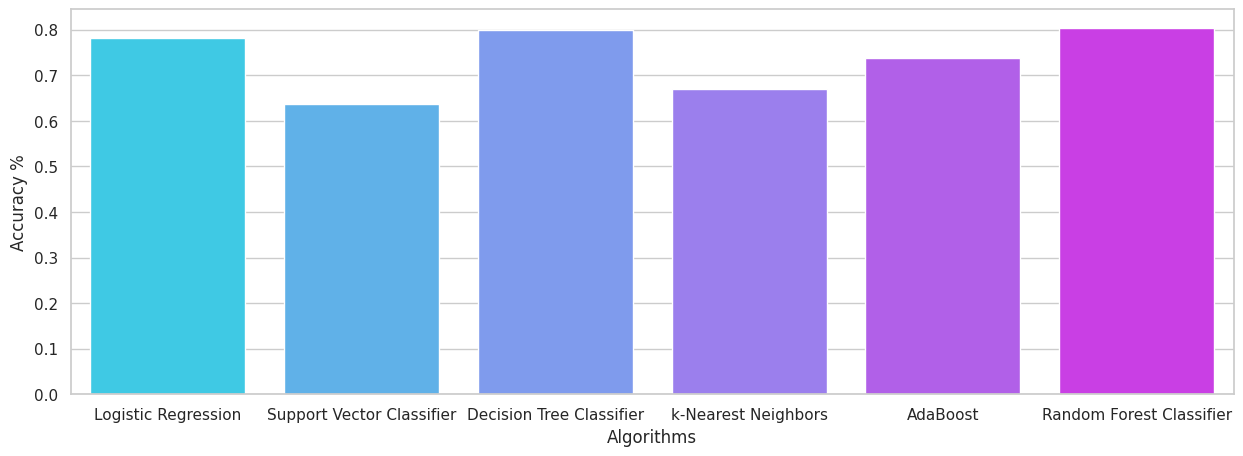

In [ ]:
# Setting seaborn style to "whitegrid"
sns.set_style("whitegrid")

# Creating a figure for the plot with specified size
plt.figure(figsize=(15,5))

# Setting labels for y-axis and x-axis
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Creating a bar plot using seaborn's barplot function
sns.barplot(x=models['Model'],y=models['Score'], palette='cool' )

# Displaying the plot
plt.show()

*The DecisionTree Classifier Model achieved the highest accuracy among all evaluated models.*